<strong><em><h1> Project #3: Determining the Promising Tariff for a Telecom Company</h1>


## Task

Conduct preliminary analysis of Megaline's "Smart" and "Ultra" tariff plans using data from 500 Megaline customers. Analyze customer demographics, location, chosen tariff plans, and the number of calls and messages sent in 2018. Determine which tariff plan yields higher revenue. This analysis will inform marketing and pricing decisions for Megaline.


**Data Description**

- **users** (User Information):
  - `user_id`: Unique user identifier
  - `first_name`: User's first name
  - `last_name`: User's last name
  - `age`: User's age (years)
  - `reg_date`: Tariff activation date (day, month, year)
  - `churn_date`: Tariff termination date (if missing, the tariff was active at the data extraction time)
  - `city`: User's city of residence
  - `tariff`: Tariff plan name

- **calls** (Call Information):
  - `id`: Unique call number
  - `call_date`: Call date
  - `duration`: Call duration in minutes
  - `user_id`: User identifier who made the call

- **messages** (Message Information):
  - `id`: Unique message number
  - `message_date`: Message date
  - `user_id`: User identifier who sent the message

- **internet** (Internet Session Information):
  - `id`: Unique session number
  - `mb_used`: Volume of internet traffic used per session (in megabytes)
  - `session_date`: Internet session date
  - `user_id`: User identifier

- **tariffs** (Tariff Information):
  - `tariff_name`: Tariff plan name
  - `rub_monthly_fee`: Monthly subscription fee in Russian rubles
  - `minutes_included`: Number of included minutes per month in the subscription fee
  - `messages_included`: Number of included messages per month in the subscription fee
  - `mb_per_month_included`: Volume of included internet traffic per month in megabytes
  - `rub_per_minute`: Cost per minute of conversation beyond the tariff package (e.g., if the tariff includes 100 minutes of conversation per month, a fee will be charged for minutes beyond that)
  - `rub_per_message`: Cost per message sent beyond the tariff package
  - `rub_per_gb`: Cost per additional gigabyte of internet traffic beyond the tariff package (1 gigabyte = 1024 megabytes)


**Project Performance Plan**

1. **Step 1: Data Inspection**
   - Open the data files and review the general information.
   - Data file paths:
     - `/datasets/calls.csv. Download dataset`
     - `/datasets/internet.csv. Download dataset`
     - `/datasets/messages.csv. Download dataset`
     - `/datasets/tariffs.csv. Download dataset`
     - `/datasets/users.csv. Download dataset`

2. **Step 2: Data Preprocessing**
   - Convert data to the required data types.
   - Identify and rectify any data errors, if present.
   - Explain the errors found and how they were corrected.
   - Note that calls with zero duration are not errors; they represent missed calls and should not be removed.
   - Calculate for each user:
     - The number of calls made and minutes used per month.
     - The number of messages sent per month.
     - The volume of internet traffic used per month.
     - Monthly revenue per user (subtract the free limit from the total calls, messages, and internet traffic; multiply the remainder by the tariff plan rates; add the subscription fee corresponding to the tariff plan).

3. **Step 3: Data Analysis**
   - Describe the behavior of the operator's customers based on the sample.
   - Analyze the monthly usage of minutes, messages, and internet traffic for each tariff.
   - Calculate the mean, variance, and standard deviation.
   - Create histograms to visualize the distributions.

4. **Step 4: Hypothesis Testing**
   - Test the following hypotheses:
     - The average revenue of "Ultra" and "Smart" tariff users differs.
     - The average revenue of users in Moscow differs from users in other regions.
   - Define the alpha threshold.
   - Explain how the null and alternative hypotheses were formulated.
   - Specify the hypothesis testing method used and justify the choice.

5. **Step 5: Write a Conclusion**
   - Format: Perform the task in a Jupyter Notebook.
   - Use code cells for program code and markdown cells for explanations.
   - Apply formatting and headings.

 <strong><em><h2>
Step 1 and Step 2. Opening Data Files and Studying General Information </h2></em></strong>


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial



In [71]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv', index_col=[0])
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs= pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

<div class="alert alert-block alert-info"> 

In all the tables, the user_id column will be the common identifier, so we "thread" the data from all tables along this axis to answer the questions about each user:

- The number of calls made and minutes used per month.
    
- The number of sent messages per month.
    
- The volume of used internet traffic per month.
    
- Monthly revenue from each user.</div>


<div class="alert alert-block alert-info">
 In the tables internet, messages, and calls, rename the columns with the same name 'id' to avoid difficulties when merging columns.</div>


In [72]:
calls.rename(columns = {'id':'call_id'}, inplace = True)
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [73]:
internet.rename(columns = {'id':'internet_id'}, inplace = True)
internet.head()

,internet_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [74]:
messages.rename(columns = {'id':'message_id'}, inplace = True)
messages.head()

,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [75]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [76]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<div class="alert alert-block alert-info"> Age look agequate - 18 years is minimum and ends with 75 years. </div>


In [77]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [78]:
users.tariff.unique()

array(['ultra', 'smart'], dtype=object)

 <div class="alert alert-block alert-info"><h4><strong>Number of Calls Made and Minutes Used per Month;</strong></h4>


<div class="alert alert-block alert-info"> Preprocess the calls table. It is extensive, and we need specific data - the number of minutes and calls for each client per month.
Considering our operator's tariff policy, we round all call duration to the next minute. 


In [79]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


<div class="alert alert-block alert-info"> For future convenient merging of tables, we will change all columns with service usage dates to the name 'month,' as we will round them to the month's digit. </div>


In [80]:
calls.rename(columns = {'call_date':'month'}, inplace = True)

In [81]:
calls.head()

,call_id,month,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


<div class="alert alert-block alert-info"> The date column is currently in object format. To extract the necessary information, we will transform it into a datetime format and then extract only the month value from it - we don't need further granularity. </div>


In [82]:
calls['month'] = pd.to_datetime(calls['month'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].astype(int)
calls.head()

,call_id,month,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [83]:
calls['month'] = calls['month'].dt.month
calls.head()

,call_id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000


In [84]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   call_id   202607 non-null  object
 1   month     202607 non-null  int32 
 2   duration  202607 non-null  int32 
 3   user_id   202607 non-null  int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 4.6+ MB


<div class="alert alert-block alert-info"> Let`s create table with necessary data from calls - amount of calls and their duration. </div>


In [85]:
call_data = calls.groupby(['user_id','month']).duration.agg(['count','sum'])
call_data.rename(columns={'count': 'calls', 'sum': 'duration'}, inplace = True)
call_data

calls  duration
user_id month                 
1000    5         22       159
        6         43       172
        7         47       340
        8         52       408
        9         58       466
...              ...       ...
1498    10        41       247
1499    9          9        70
        10        68       449
        11        74       612
        12        69       492

[3174 rows x 2 columns]

<div class="alert alert-block alert-info"> - The number of sent messages per month; </div>


In [86]:
messages.rename(columns = {'message_date':'month'}, inplace = True)

In [87]:
messages['month'] = pd.to_datetime(messages['month'], format='%Y-%m-%d')

In [88]:
messages['month'] = messages['month'].dt.month

In [89]:
messages

,message_id,month,user_id
0,1000_0,6,1000
1,1000_1,10,1000
2,1000_2,8,1000
3,1000_3,6,1000
4,1000_4,12,1000
...,...,...,...
123031,1499_179,12,1499
123032,1499_180,9,1499
123033,1499_181,9,1499
123034,1499_182,11,1499


In [90]:
messages_count = messages.groupby(['user_id','month']).count()

messages_count.rename(columns = {'message_id':'messages'},inplace = True)

messages_count

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

<div class="alert alert-block alert-info"> Now, we are creating a table with data on messages and calls. </div>


In [91]:
call_plus_message = call_data.join(messages_count, how = 'outer')

call_plus_message

calls  duration  messages
user_id month                           
1000    5       22.0     159.0      22.0
        6       43.0     172.0      60.0
        7       47.0     340.0      75.0
        8       52.0     408.0      81.0
        9       58.0     466.0      57.0
...              ...       ...       ...
1498    10      41.0     247.0      42.0
1499    9        9.0      70.0      11.0
        10      68.0     449.0      48.0
        11      74.0     612.0      59.0
        12      69.0     492.0      66.0

[3213 rows x 3 columns]

<div class="alert alert-block alert-info"> - The volume of used internet traffic per month; </div>


In [92]:
internet['gb_used'] = (internet['mb_used']/1024)
internet


,internet_id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,0.311426
149392,1499_153,490.13,2018-12-14,1499,0.478643
149393,1499_154,0.00,2018-10-27,1499,0.000000
149394,1499_155,1246.32,2018-11-26,1499,1.217109


In [93]:
internet.rename(columns = {'session_date':'month'}, inplace = True)

In [94]:
internet['month'] = pd.to_datetime(internet['month'], format='%Y-%m-%d')

internet.head(5)

,internet_id,mb_used,month,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469


In [95]:
internet['month'] = internet['month'].dt.month

In [96]:
internet.head(5)

,internet_id,mb_used,month,user_id,gb_used
0,1000_0,112.95,11,1000,0.110303
1,1000_1,1052.81,9,1000,1.028135
2,1000_2,1197.26,6,1000,1.169199
3,1000_3,550.27,8,1000,0.537373
4,1000_4,302.56,9,1000,0.295469


In [97]:
user_internet = internet.groupby(['user_id','month']).sum()
user_internet

internet_id   mb_used  \
user_id month                                                                
1000    5                  1000_511000_591000_961000_1031000_134   2253.49   
        6      1000_21000_121000_161000_171000_251000_301000_...  23233.77   
        7      1000_71000_151000_221000_421000_571000_821000_...  14003.64   
        8      1000_31000_111000_131000_141000_201000_271000_...  14055.93   
        9      1000_11000_41000_61000_91000_101000_281000_341...  14568.91   
...                                                          ...       ...   
1498    10     1498_11498_31498_71498_101498_131498_191498_23...  20579.36   
1499    9                  1499_101499_581499_981499_1121499_135   1845.75   
        10     1499_01499_31499_51499_81499_111499_161499_201...  17788.51   
        11     1499_61499_71499_91499_121499_181499_191499_25...  17963.31   
        12     1499_11499_21499_41499_131499_141499_151499_17...  13055.58   

                 gb_used  
user_id month             
1000    5       2.200674  
        6      22.689229  
        7      13.675430  
        8      13.726494  
        9      14.227451  
...                  ...  
1498    10     20.097031  
1499    9       1.802490  
        10     17.371592  
        11     17.542295  
        12     12.749590  

[3203 rows x 3 columns]

<div class="alert alert-block alert-info"> Taking into account the tariff features of the operator, we round up all the monthly data usage to the nearest higher value. </div>


In [98]:
user_internet = user_internet[['gb_used']].apply(np.ceil)
user_internet

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

<div class="alert alert-block alert-info"> We are merging the "big three" (internet + calls + SMS) into one table: </div>


In [99]:
whole_user = call_plus_message.join(user_internet, how = 'outer')
whole_user.fillna(0, inplace=True)

In [100]:
whole_user.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   duration  3214 non-null   float64
 2   messages  3214 non-null   float64
 3   gb_used   3214 non-null   float64
dtypes: float64(4)
memory usage: 130.1 KB


<div class="alert alert-block alert-info"> There are some missing values in messages and gb_used. Most likely, the service was not used. </div>


<div class="alert alert-block alert-info"> After the merging, we ended up with a multi-index 'user-id'/'month'. To avoid issues in future merges, we are resetting the index. </div>


In [101]:
whole_user.reset_index(inplace = True)
whole_user.head()

,user_id,month,calls,duration,messages,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


<div class="alert alert-block alert-info"><h4><strong>- Monthly Revenue from Each User</strong></h4></div>
<div class="alert alert-block alert-info"> Adding the name of the tariff used by each user. </div>


In [102]:
whole_user_tarif = whole_user.merge(users[['user_id','tariff']], on='user_id',how = 'left')
whole_user_tarif

,user_id,month,calls,duration,messages,gb_used,tariff
0,1000,5,22.0,159.0,22.0,3.0,ultra
1,1000,6,43.0,172.0,60.0,23.0,ultra
2,1000,7,47.0,340.0,75.0,14.0,ultra
3,1000,8,52.0,408.0,81.0,14.0,ultra
4,1000,9,58.0,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0,smart
3210,1499,9,9.0,70.0,11.0,2.0,smart
3211,1499,10,68.0,449.0,48.0,18.0,smart
3212,1499,11,74.0,612.0,59.0,18.0,smart


<div class="alert alert-block alert-info"> To facilitate understanding, we convert the included traffic into gigabytes. </div>


In [103]:
tariffs['gb_included'] = (tariffs['mb_per_month_included']/1024)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


<div class="alert alert-block alert-info"> We remove the redundant column with included megabytes because we have converted it into a column with gigabytes andd duplicated 'tariff_name' column. </div>


In [104]:
money = whole_user_tarif.merge(tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'left')
columns_to_drop = ['tariff_name', 'mb_per_month_included']
money.drop(columns = columns_to_drop, axis=1, inplace=True)
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3214 non-null   int64  
 1   month              3214 non-null   int32  
 2   calls              3214 non-null   float64
 3   duration           3214 non-null   float64
 4   messages           3214 non-null   float64
 5   gb_used            3214 non-null   float64
 6   tariff             3214 non-null   object 
 7   messages_included  3214 non-null   int64  
 8   minutes_included   3214 non-null   int64  
 9   rub_monthly_fee    3214 non-null   int64  
 10  rub_per_gb         3214 non-null   int64  
 11  rub_per_message    3214 non-null   int64  
 12  rub_per_minute     3214 non-null   int64  
 13  gb_included        3214 non-null   float64
dtypes: float64(5), int32(1), int64(7), object(1)
memory usage: 339.1+ KB


<div class="alert alert-block alert-info"> We calculate the components of revenue: messages, minutes, and gigabytes beyond the tariff limits. </div>



In [105]:
money['money_message'] = np.maximum(money.messages - money.messages_included, 0)*money.rub_per_message
money['money_calls'] = np.maximum(money.duration - money.minutes_included, 0)*money.rub_per_minute
money['money_internet'] = np.maximum(money.gb_used - money.gb_included, 0)*money.rub_per_gb
money['customer_gross'] = money.rub_monthly_fee+money.money_internet+money.money_calls+money.money_message
money.head(15)

,user_id,month,calls,duration,messages,gb_used,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,money_message,money_calls,money_internet,customer_gross
0,1000,5,22.0,159.0,22.0,3.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,15.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
5,1000,10,57.0,350.0,73.0,15.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
6,1000,11,43.0,338.0,58.0,15.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
7,1000,12,46.0,333.0,70.0,10.0,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
8,1001,11,59.0,430.0,0.0,18.0,smart,50,500,550,200,3,3,15.0,0.0,0.0,600.0,1150.0
9,1001,12,63.0,414.0,0.0,14.0,smart,50,500,550,200,3,3,15.0,0.0,0.0,0.0,550.0


In [106]:
money[money['user_id']== 1499]

,user_id,month,calls,duration,messages,gb_used,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,money_message,money_calls,money_internet,customer_gross
3210,1499,9,9.0,70.0,11.0,2.0,smart,50,500,550,200,3,3,15.0,0.0,0.0,0.0,550.0
3211,1499,10,68.0,449.0,48.0,18.0,smart,50,500,550,200,3,3,15.0,0.0,0.0,600.0,1150.0
3212,1499,11,74.0,612.0,59.0,18.0,smart,50,500,550,200,3,3,15.0,27.0,336.0,600.0,1513.0
3213,1499,12,69.0,492.0,66.0,13.0,smart,50,500,550,200,3,3,15.0,48.0,0.0,0.0,598.0


<div class="alert alert-block alert-info"> Если бы делал проект для менеджера - только следующая таблица его интересовала бы из всех что были до этого ))  </div>

In [107]:
gross = money[['user_id','month','tariff','customer_gross']]
gross

,user_id,month,tariff,customer_gross
0,1000,5,ultra,1950.0
1,1000,6,ultra,1950.0
2,1000,7,ultra,1950.0
3,1000,8,ultra,1950.0
4,1000,9,ultra,1950.0
...,...,...,...,...
3209,1498,10,smart,1750.0
3210,1499,9,smart,550.0
3211,1499,10,smart,1150.0
3212,1499,11,smart,1513.0


<strong><em><h2>Step 3. Analyzing the Data</h2></em></strong>


<div class="alert alert-block alert-info">
    We will describe the behavior of the operator's customers based on the sample.
    We will determine how many minutes of conversation, how many messages, and what volume of internet traffic users of each tariff need per month.
    We will calculate the mean, variance, and standard deviation. We will also create histograms and describe the distributions.
</div>


<div class="alert alert-block alert-info"> 
    We will create a table with the necessary columns for analysis, referred to as "user pattern" (up).
</div>


In [108]:
pattern = money[['duration','messages','gb_used','tariff']]
pattern.head()

,duration,messages,gb_used,tariff
0,159.0,22.0,3.0,ultra
1,172.0,60.0,23.0,ultra
2,340.0,75.0,14.0,ultra
3,408.0,81.0,14.0,ultra
4,466.0,57.0,15.0,ultra


<div class="alert alert-block alert-info"> 
    We will calculate the mean, variance, and standard deviation for the entire dataset.
</div>


In [109]:
#up = money[['user_id','month','calls','duration','messages','gb_used','tariff_name','gross']]

#.duration.agg(['count','sum'])
pattern[['duration','messages','gb_used']].agg(['mean','var','std'])

,duration,messages,gb_used
mean,451.244866,38.281269,17.299004
var,58520.437688,1306.701442,54.768645
std,241.909978,36.148326,7.400584


<div class="alert alert-block alert-info"> 
    We will calculate the mean, variance, and standard deviation for the "smart" tariff.
</div>


In [110]:
smart_up = pattern.query('tariff == "smart"')[['duration','messages','gb_used']].agg(['mean','var','std'])
smart_up

,duration,messages,gb_used
mean,417.934948,33.384029,16.328847
var,36219.315784,796.812958,33.028705
std,190.313730,28.227876,5.747061


<div class="alert alert-block alert-info"> 
    We will calculate the mean, variance, and standard deviation for the "ultra" tariff.
</div>


In [111]:
ultra_up = pattern.query('tariff == "ultra"')[['duration','messages','gb_used']].agg(['mean','var','std'])
ultra_up

,duration,messages,gb_used
mean,526.623350,49.363452,19.494416
var,100873.633397,2285.266143,97.091686
std,317.606098,47.804457,9.853511


<div class="alert alert-block alert-info"> 
    We are creating distribution histograms.
</div>


<div class="alert alert-block alert-info"> 
    Call duration.
</div>


In [112]:
from matplotlib.ticker import PercentFormatter

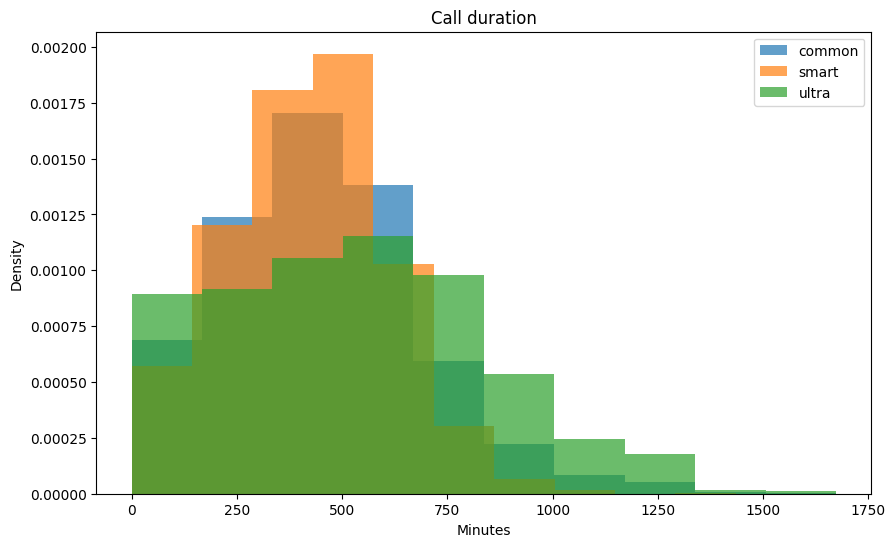

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(pattern.duration, label = 'common', alpha = 0.7, density = True) 
plt.hist(pattern.query('tariff == "smart"').duration, alpha = 0.7, label = 'smart', density = True)
plt.hist(pattern.query('tariff == "ultra"').duration, alpha = 0.7, label = 'ultra', density = True)
plt.ylabel('Density')
plt.xlabel('Minutes')
plt.title('Call duration')
plt.legend()
plt.show()



<div class="alert alert-block alert-info"> 

    The histogram for the ultra tariff is more distributed - considering the large buffer of free minutes, everyone speaks as much as they can and need, whereas in the histogram for the smart tariff, it is evident that customers are cautious about the number of minutes, and after reaching the threshold of 500 free minutes, they speak very conservatively.
    However, even with a larger reserve of minutes, ultra tariff users rarely exceed 700 minutes.
</div>


<div class="alert alert-block alert-info"> 

    Number of messages.
</div>


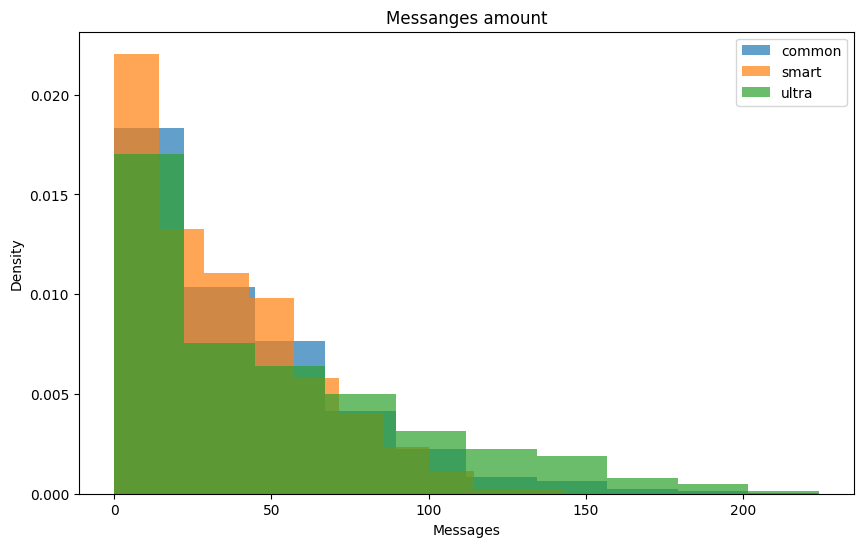

In [114]:

plt.figure(figsize=(10, 6))
plt.hist(pattern.messages, label = 'common', alpha = 0.7, density = True)  #up.query('tariff_name == "ultra"')['duration']
plt.hist(pattern.query('tariff == "smart"').messages, alpha = 0.7, label = 'smart', density = True)
plt.hist(pattern.query('tariff == "ultra"').messages, alpha = 0.7, label = 'ultra', density = True)
plt.ylabel('Density')
plt.xlabel('Messages')
plt.title('Messanges amount')
plt.legend()
plt.show()

<div class="alert alert-block alert-info"> 
    Based on the histogram, owners of both tariffs rarely use SMS messages - the majority of people send no more than one message per month, and it doesn't vary significantly depending on the tariff. Messaging apps rule the day.
</div>


<div class="alert alert-block alert-info"> 
    Volume of used traffic.
</div>


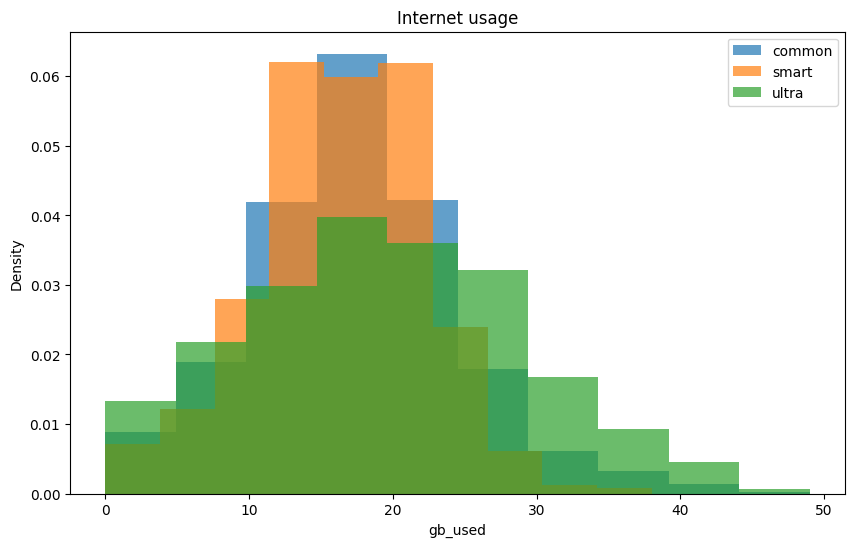

In [115]:


plt.figure(figsize=(10, 6))
plt.hist(pattern.gb_used, label = 'common', alpha = 0.7, density = True) 
plt.hist(pattern.query('tariff == "smart"').gb_used, alpha = 0.7, label = 'smart', density = True)
plt.hist(pattern.query('tariff == "ultra"').gb_used, alpha = 0.7, label = 'ultra', density = True)
plt.ylabel('Density')
plt.xlabel('gb_used')
plt.title('Internet usage')
plt.legend()
plt.show()

<div class="alert alert-block alert-info"> 
    The overall need for 17-18 GB of incoming traffic is characteristic of both tariffs. Despite the greater distribution, less than 2% of customers on the ultra tariff exceed 30 GB.
</div>


<strong><em><h2>Step 4. Testing Hypotheses</h2></em></strong>


<div class="alert alert-block alert-info"> 
    Hypothesis 1: The average revenue of users on the "Ultra" and "Smart" tariffs differs.
</div>


<div class="alert alert-block alert-info"> 
    Accordingly, we formulate the null hypothesis as "The Smart and Ultra tariffs have the same average user revenue," and the alternative hypothesis will suggest that they are not equal.
</div>


<div class="alert alert-block alert-info"> 
    To begin with, we clean the revenue data for each of the tariffs from outliers. To clean it, I will calculate an appropriate sample using the three-sigma rule.
</div>


In [116]:
mean_value_ultra = gross.query('tariff == "ultra"')['customer_gross'].mean()
std_deviation_ultra = gross.query('tariff == "ultra"')['customer_gross'].std()

lower_bound_ultra = mean_value_ultra - 3 * std_deviation_ultra
upper_bound_ultra = mean_value_ultra + 3 * std_deviation_ultra

cleaned_data_ultra = gross[(gross['tariff'] == 'ultra') & (gross['customer_gross'] >= lower_bound_ultra) & (gross['customer_gross'] <= upper_bound_ultra)]
print('Mean value before cleaning:', mean_value_ultra)
print('Standart deviation before cleaning:', std_deviation_ultra)
print('Cleaned Ultra tariff dataset:')
cleaned_data_ultra.customer_gross.describe()


Mean value before cleaning: 2070.1522842639592
Standart deviation before cleaning: 376.1871144505328
Cleaned Ultra tariff dataset:


count     951.000000
mean     2012.145110
std       210.493715
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3150.000000
Name: customer_gross, dtype: float64

In [137]:
mean_value_smart = gross.query('tariff == "smart"')['customer_gross'].mean()
std_deviation_smart = gross.query('tariff == "smart"')['customer_gross'].std()

lower_bound_smart = mean_value_smart - 3 * std_deviation_smart
upper_bound_smart = mean_value_smart + 3 * std_deviation_smart

cleaned_data_smart = gross[(gross['tariff'] == 'smart') & (gross['customer_gross'] >= lower_bound_smart) & (gross['customer_gross'] <= upper_bound_smart)]
print('Mean value before cleaning:', mean_value_smart)
print('Standart deviation before cleaning:', std_deviation_smart)
print('Cleaned Smart tariff dataset:')
cleaned_data_smart.customer_gross.describe()

Mean value before cleaning: 1289.9735307312696
Standart deviation before cleaning: 818.4043670499469
Cleaned Smart tariff dataset:


count    2202.000000
mean     1250.492734
std       736.344550
min       550.000000
25%       550.000000
50%      1008.000000
75%      1750.000000
max      3693.000000
Name: customer_gross, dtype: float64

<div class="alert alert-block alert-info"> 
Формируем датафрейм с необходимой выборкой усредненной выручки

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Спасибо за комментарий

</div>

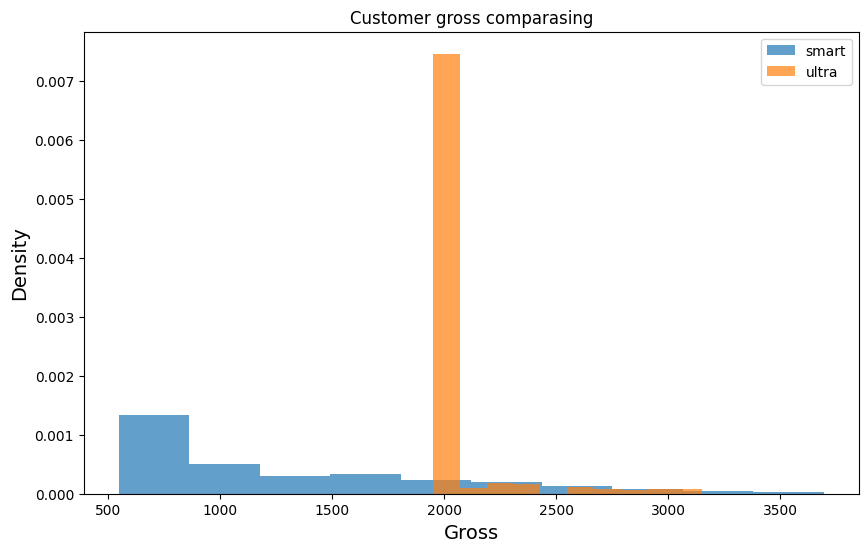

In [118]:
plt.figure(figsize=(10, 6))
#plt.hist(pattern.gb_used, label = 'common', alpha = 0.7, density = True) 
plt.hist(cleaned_data_smart.customer_gross, alpha = 0.7, label = 'smart', density = True)
plt.hist(cleaned_data_ultra.customer_gross, alpha = 0.7, label = 'ultra', density = True)
plt.ylabel('Density', fontsize = '14')
plt.xlabel('Gross', fontsize = '14')
plt.title('Customer gross comparasing')
plt.legend()
plt.show()

In [119]:
alpha = .05
results = st.ttest_ind(cleaned_data_ultra.customer_gross, cleaned_data_smart.customer_gross)
results.pvalue


5.4407469482712685e-188

<div class="alert alert-block alert-info"> 
    We reject the null hypothesis - the revenue is different.
</div>


<div class="alert alert-block alert-info"> 
    Hypothesis 2: The average revenue of users from Moscow differs from the revenue of users from other regions.
</div>


<div class="alert alert-block alert-info"> 
    The corresponding null hypothesis is "revenue is the same," so the alternative hypothesis would be "revenue is different."
</div>


<div class="alert alert-block alert-info"> 
    To obtain the necessary samples, we filter the revenue table based on the city parameter from the users table.
</div>


In [120]:
Moscow_users = users.query('city == "Москва"')
Moscow_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1 to 490
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   churn_date  9 non-null      object
 3   city        99 non-null     object
 4   first_name  99 non-null     object
 5   last_name   99 non-null     object
 6   reg_date    99 non-null     object
 7   tariff      99 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.0+ KB


In [121]:
other_city_users = users.query('city != "Москва"')
other_city_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     401 non-null    int64 
 1   age         401 non-null    int64 
 2   churn_date  29 non-null     object
 3   city        401 non-null    object
 4   first_name  401 non-null    object
 5   last_name   401 non-null    object
 6   reg_date    401 non-null    object
 7   tariff      401 non-null    object
dtypes: int64(2), object(6)
memory usage: 28.2+ KB


In [129]:
mean_value_Moscow = gross.query('user_id in @Moscow_users.user_id')['customer_gross'].mean()
std_deviation_Moscow = gross.query('user_id in @Moscow_users.user_id')['customer_gross'].std()

lower_bound_Moscow = mean_value_Moscow - 3 * std_deviation_Moscow
upper_bound_Moscow = mean_value_Moscow + 3 * std_deviation_Moscow

cleaned_data_Moscow = gross[(gross['user_id'].isin(Moscow_users['user_id'])) & (gross['customer_gross'] >= lower_bound_Moscow) & (gross['customer_gross'] <= upper_bound_Moscow)]
print('Mean value before cleaning:', mean_value_Moscow)
print('Standart deviation before cleaning:', std_deviation_Moscow)
print('Cleaned Moscow users gross dataset:')
cleaned_data_Moscow.customer_gross.describe()

Mean value before cleaning: 1546.7135842880523
Standart deviation before cleaning: 752.0880713133841
Cleaned Moscow users gross dataset:


count     607.000000
mean     1528.261944
std       717.739292
min       550.000000
25%       764.000000
50%      1750.000000
75%      1950.000000
max      3750.000000
Name: customer_gross, dtype: float64

In [131]:
mean_value_other_cities = gross.query('user_id in @other_city_users.user_id')['customer_gross'].mean()
std_deviation_other_cities = gross.query('user_id in @other_city_users.user_id')['customer_gross'].std()

lower_bound_other_cities = mean_value_other_cities - 3 * std_deviation_other_cities
upper_bound_other_cities = mean_value_other_cities + 3 * std_deviation_other_cities

cleaned_data_other_cities = gross[(gross['user_id'].isin(other_city_users['user_id'])) & (gross['customer_gross'] >= lower_bound_other_cities) & (gross['customer_gross'] <= upper_bound_other_cities)]
print('Mean value before cleaning:', mean_value_other_cities)
print('Standart deviation before cleaning:', std_deviation_other_cities)
print('Cleaned Other cities users gross dataset:')
cleaned_data_other_cities.customer_gross.describe()

Mean value before cleaning: 1524.9362274298885
Standart deviation before cleaning: 808.7877524553716
Cleaned Other cities users gross dataset:


count    2583.000000
mean     1499.795199
std       757.075877
min       550.000000
25%       750.000000
50%      1565.000000
75%      1950.000000
max      3950.000000
Name: customer_gross, dtype: float64

In [136]:
alpha = 0.05
rev1 = st.ttest_ind(cleaned_data_Moscow.customer_gross, cleaned_data_other_cities.customer_gross)
rev1.pvalue



0.39999630105665085

<div class="alert alert-block alert-info"> 

p-value = 0.399

In the null hypothesis, we assume that the means of the samples are the same.

With alpha = 0.05, we cannot reject the hypothesis of equal means between the samples.


</div>

 <strong><em><h2>
 Шаг 5. Общие выводы </em></strong></h2>

After conducting all the research and testing hypotheses, it can be unequivocally concluded that the "Ultra" tariff is highly beneficial for the operator. On average, it generates nearly twice as much revenue, even though when analyzing customer behavior, it becomes evident that fewer than half of the users actually utilize the extra minutes, SMS, and gigabytes included in the plan. Many of them could have comfortably settled for the more affordable "Smart" tariff.

There is a general trend of high internet traffic consumption: in both tariffs, the majority of users consumed around 18 GB per month while sending minimal SMS messages.

Analyzing the tariffs and observing the overages incurred by "Smart" tariff users who exceeded their data limits, it is possible to propose a new tariff to the operator. This new tariff could offer the same number of minutes and SMS messages but with a significantly higher data allowance, nearly double the price of the subscription fee (1,350 rubles). This makes sense as people are effectively already paying these amounts, but as excess charges.


In [90]:
money.query('tariff_name == "smart" and gb_used > 18')['gross'].describe()

count     797.000000
mean     2153.281054
std       720.192654
min      1350.000000
25%      1577.000000
50%      1969.000000
75%      2550.000000
max      6770.000000
Name: gross, dtype: float64